In [174]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [175]:
dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaHandelseK'
dead_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

pop_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'
pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [176]:
def get_data(url,query):
    r = requests.post(url,json=query)
    
    if r.status_code != 200 :
        print (r.status_code)
    
    data = pd.DataFrame.from_dict(r.json()['data'])
    data[['area','age','gender','year']] = data['key'].to_list()
    data['count'] = data['values'].apply(lambda x : x[0])
    data['age'] = data['age'].apply(lambda x : x.replace('+','')).astype(int)
    data.drop(['values','key','area'],axis=1,inplace=True)
    data.set_index('year',inplace=True)
    data['count'] = data['count'].astype(int)
    data = data.groupby(['year','age']).sum()
    
    return data
    



In [177]:
dead_df = get_data(dead_url,dead_query)
dead_df

count
year age       
1968 0     1478
     1       87
     2       63
     3       62
     4       50
...         ...
2020 96    1789
     97    1270
     98    1065
     99     759
     100   1247

[5353 rows x 1 columns]

In [178]:
dead_df.loc['2020'].head(40)

,count
age,
0,268
1,22
2,12
3,6
4,12
5,8
6,7
7,9
8,5


In [179]:
pop_df = get_data(pop_url,pop_query)
pop_df

count
year age       
2002 0    82336
     1    92580
     2    92138
     3    90251
     4    91214
...         ...
2020 96    5709
     97    3972
     98    2707
     99    1915
     100   2715

[1919 rows x 1 columns]

In [180]:
dead_df.to_excel('official_deaths.xlsx')
pop_df.to_excel('official_pop.xlsx')

In [181]:
total_dead = dead_df.groupby('year').sum()
total_pop = pop_df.groupby('year').sum()

mortality = (total_dead / total_pop).dropna()
mortality

,count
year,
2002,0.010628
2003,0.010360
2004,0.010049
2005,0.010142
2006,0.010011
2007,0.009998
2008,0.009887
2009,0.009653
2010,0.009618


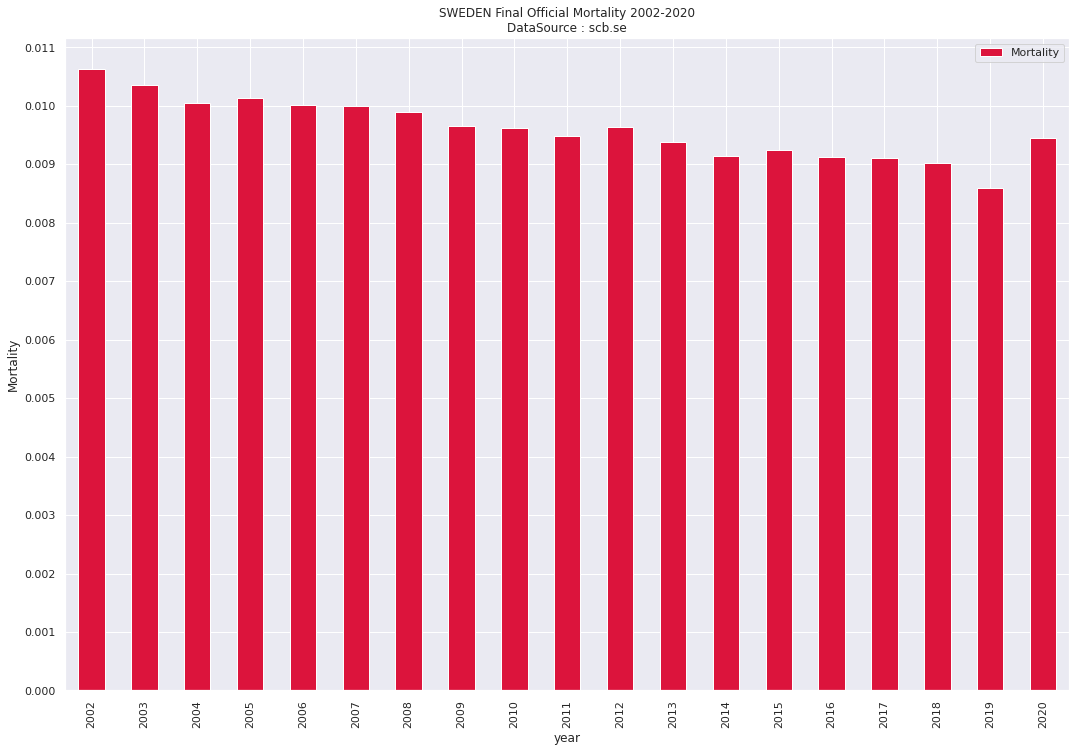

In [182]:
title='SWEDEN Final Official Mortality 2002-2020\nDataSource : scb.se'
mortality.plot(kind='bar',color='crimson',figsize=(18,12),title=title)
plt.legend(['Mortality'])
plt.ylabel('Mortality')
plt.yticks(np.arange(0,0.012,0.001))
plt.savefig('SCB_FINAL_mortality.jpg',format='jpg')

In [183]:
def binner(df,binsize=10):
    
    binned = pd.cut(df.index.get_level_values(1),range(-1,100+binsize,binsize),labels=range(0,100+binsize,binsize))
    return binned

In [184]:
pop_df['bin_10'] = binner(pop_df)
dead_df['bin_10'] = binner(dead_df)

dead_df

count bin_10
year age              
1968 0     1478      0
     1       87      0
     2       63      0
     3       62      0
     4       50      0
...         ...    ...
2020 96    1789     90
     97    1270     90
     98    1065     90
     99     759     90
     100   1247    100

[5353 rows x 2 columns]

In [185]:
binned_pop = pop_df.groupby(['year','bin_10']).sum()
binned_dead = dead_df.groupby(['year','bin_10']).sum()
binned_dead

count
year bin_10       
1968 0        1953
     10        534
     20       1025
     30       1260
     40       2923
...            ...
2020 60       9170
     70      23135
     80      34574
     90      23053
     100      1247

[583 rows x 1 columns]

In [186]:
age_grp_mortality = (binned_dead / binned_pop).dropna()
age_grp_mortality

count
year bin_10          
2002 0       0.000429
     10      0.000208
     20      0.000491
     30      0.000641
     40      0.001578
...               ...
2020 60      0.008279
     70      0.022863
     80      0.076659
     90      0.227549
     100     0.459300

[209 rows x 1 columns]

In [187]:
unstacked_age_grp_mortality = age_grp_mortality.unstack()
unstacked_age_grp_mortality = unstacked_age_grp_mortality.droplevel(0,axis=1)
unstacked_age_grp_mortality

bin_10,0,10,20,30,40,50,60,70,80,90,100
year,,,,,,,,,,,
2002,0.000429,0.000208,0.000491,0.000641,0.001578,0.004305,0.010705,0.031648,0.092014,0.239101,0.456255
2003,0.000444,0.000212,0.000478,0.000629,0.001600,0.004160,0.010388,0.030834,0.089277,0.227208,0.470274
2004,0.000426,0.000205,0.000517,0.000594,0.001497,0.004181,0.009971,0.029402,0.085865,0.219046,0.427636
2005,0.000398,0.000180,0.000484,0.000603,0.001438,0.004191,0.009985,0.029105,0.086357,0.225085,0.437801
2006,0.000425,0.000205,0.000464,0.000608,0.001375,0.004034,0.009597,0.028247,0.085737,0.224001,0.446906
2007,0.000383,0.000212,0.000483,0.000584,0.001394,0.003887,0.009558,0.027295,0.086511,0.228231,0.450063
2008,0.000355,0.000210,0.000499,0.000589,0.001339,0.003824,0.009487,0.026354,0.085905,0.227699,0.451270
2009,0.000397,0.000203,0.000454,0.000592,0.001325,0.003766,0.009134,0.025740,0.084310,0.219056,0.443558
2010,0.000370,0.000194,0.000471,0.000539,0.001234,0.003545,0.009279,0.025656,0.083360,0.213476,0.466078


In [188]:
age_grp_baseline = unstacked_age_grp_mortality.loc['2015' : '2018'].mean()
age_grp_baseline

bin_10
0      0.000313
10     0.000161
20     0.000483
30     0.000587
40     0.001126
50     0.002951
60     0.008674
70     0.022051
80     0.075992
90     0.217684
100    0.463904
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


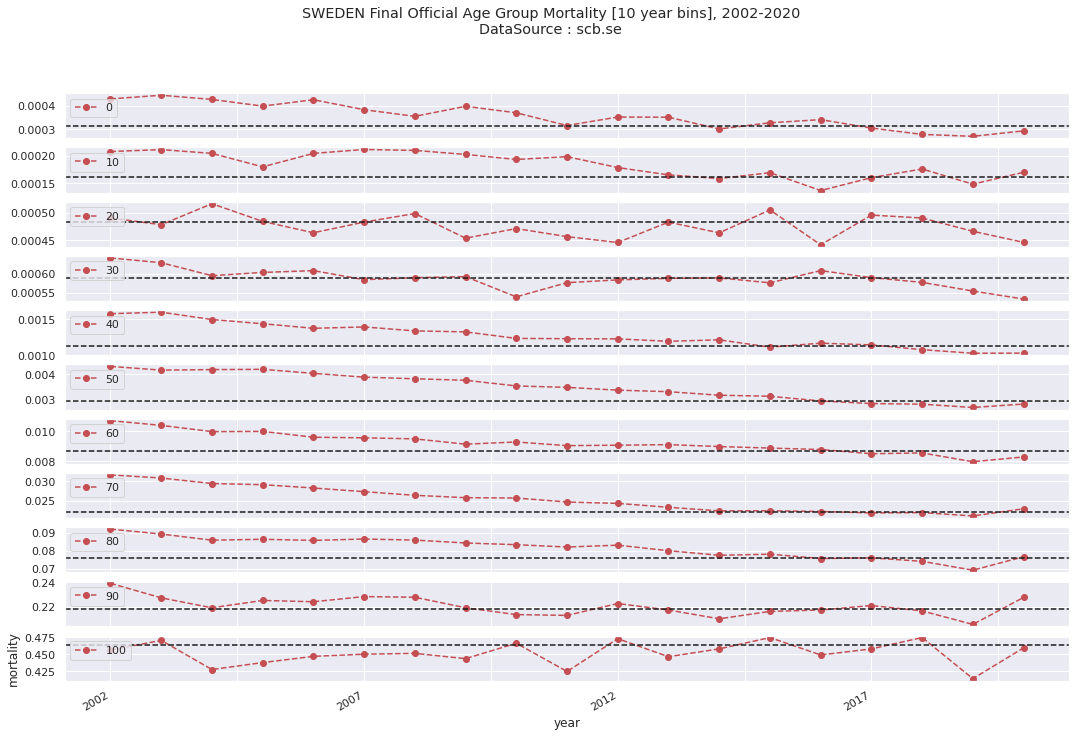

In [189]:
title = 'SWEDEN Final Official Age Group Mortality [10 year bins], 2002-2020\nDataSource : scb.se'
axes = unstacked_age_grp_mortality.plot(subplots=True,figsize=(18,12),style='ro--',title=title)
plt.ylabel('mortality')

for i,ax in enumerate(axes):
    ax.legend(loc='upper left')
    ax.axhline(age_grp_baseline.iloc[i],ls='dashed',color='k')
    
plt.savefig('SCB_FINAL_age_grp_mort.jpg',format='jpg')


In [190]:
age_grp_growth_vs_baseline = unstacked_age_grp_mortality / age_grp_baseline
age_grp_growth_vs_baseline

bin_10,0,10,20,30,40,50,60,70,80,90,100
year,,,,,,,,,,,
2002,1.368149,1.293022,1.015090,1.091607,1.401974,1.458469,1.234160,1.435227,1.210831,1.098383,0.983513
2003,1.417173,1.314901,0.989572,1.070157,1.420957,1.409451,1.197639,1.398301,1.174817,1.043750,1.013733
2004,1.360631,1.272263,1.068902,1.012048,1.329857,1.416482,1.149531,1.333375,1.129923,1.006256,0.921821
2005,1.270773,1.120215,1.002117,1.026571,1.277809,1.419827,1.151225,1.319901,1.136397,1.033998,0.943732
2006,1.356792,1.271979,0.959257,1.034673,1.221606,1.366939,1.106453,1.280973,1.128240,1.029016,0.963359
2007,1.222453,1.316512,0.999482,0.993973,1.238141,1.317109,1.101933,1.237819,1.138425,1.048449,0.970165
2008,1.132685,1.305963,1.031758,1.002903,1.189486,1.295530,1.093810,1.195133,1.130447,1.046005,0.972766
2009,1.268045,1.260328,0.938826,1.007716,1.176951,1.275924,1.053052,1.167321,1.109456,1.006301,0.956142
2010,1.180665,1.203730,0.974981,0.916962,1.096642,1.201234,1.069824,1.163504,1.096959,0.980669,1.004688


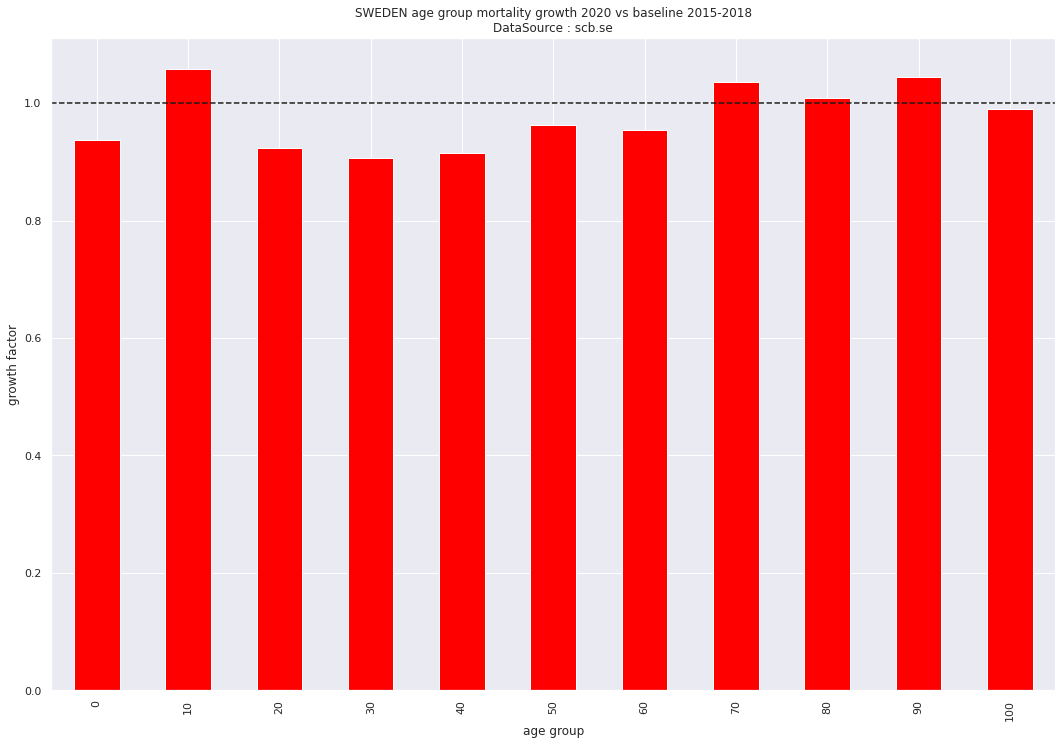

In [191]:
title = 'SWEDEN age group mortality growth 2020 vs baseline 2015-2018\nDataSource : scb.se'
age_grp_growth_vs_baseline.loc['2020'].plot(kind='bar',figsize=(18,12),color='red',title=title)

plt.ylabel('growth factor')
plt.xlabel('age group')
plt.axhline(1,ls='dashed',color='k')

plt.savefig('SCB_FINAL_age_grp_growth.jpg',format='jpg')

In [192]:
binned_dead.loc['2020']

,count
bin_10,
0,352
10,204
20,578
30,745
40,1340
50,3726
60,9170
70,23135
80,34574


In [193]:
pop_df['bin_5'] = binner(pop_df,5)
dead_df['bin_5'] = binner(dead_df,5)
pop_df.tail()

count bin_10 bin_5
year age                    
2020 96    5709     90    95
     97    3972     90    95
     98    2707     90    95
     99    1915     90    95
     100   2715    100   100

In [194]:
binned_5_dead = dead_df.groupby(['year','bin_5']).sum()
binned_5_pop = pop_df.groupby(['year','bin_5']).sum()
binned_5_dead.loc['2020']

,count
bin_5,
0,320
5,32
10,56
15,148
20,246
25,332
30,367
35,378
40,516


In [195]:

binned_5_mort = (binned_5_dead / binned_5_pop).dropna()
binned_5_unstacked = binned_5_mort.unstack().droplevel(0,axis=1)
binned_5_unstacked

bin_5,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
year,,,,,,,,,,,,,,,,,,,,,
2002,0.000852,0.000068,0.000108,0.000325,0.000531,0.000454,0.000558,0.000718,0.001207,0.001949,...,0.005313,0.008102,0.013936,0.023445,0.040667,0.070999,0.130200,0.219055,0.334341,0.456255
2003,0.000831,0.000090,0.000103,0.000335,0.000476,0.000481,0.000504,0.000742,0.001207,0.002000,...,0.005036,0.007966,0.013483,0.023178,0.039215,0.069794,0.124975,0.206449,0.325321,0.470274
2004,0.000769,0.000090,0.000104,0.000313,0.000548,0.000486,0.000480,0.000702,0.001088,0.001926,...,0.005096,0.007754,0.012886,0.022239,0.037312,0.067055,0.120301,0.199964,0.306209,0.427636
2005,0.000684,0.000105,0.000104,0.000256,0.000469,0.000499,0.000492,0.000709,0.001077,0.001831,...,0.005133,0.007696,0.013107,0.021692,0.037306,0.068328,0.116462,0.206967,0.304995,0.437801
2006,0.000738,0.000092,0.000093,0.000307,0.000496,0.000432,0.000504,0.000707,0.001056,0.001733,...,0.004927,0.007637,0.012336,0.021066,0.036310,0.066792,0.115367,0.202979,0.315491,0.446906
2007,0.000660,0.000086,0.000083,0.000321,0.000469,0.000497,0.000481,0.000681,0.001046,0.001791,...,0.004775,0.007575,0.012273,0.019866,0.035774,0.065920,0.117803,0.206288,0.321417,0.450063
2008,0.000634,0.000057,0.000114,0.000287,0.000471,0.000527,0.000546,0.000629,0.001067,0.001645,...,0.004680,0.007611,0.011938,0.019359,0.034707,0.064742,0.117191,0.205965,0.318635,0.451270
2009,0.000685,0.000093,0.000115,0.000271,0.000444,0.000465,0.000485,0.000689,0.001034,0.001636,...,0.004610,0.007366,0.011285,0.019233,0.033824,0.062530,0.115909,0.196675,0.312349,0.443558
2010,0.000661,0.000062,0.000090,0.000275,0.000450,0.000494,0.000504,0.000570,0.000920,0.001553,...,0.004423,0.007541,0.011227,0.018852,0.034382,0.061584,0.115375,0.192646,0.306449,0.466078


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


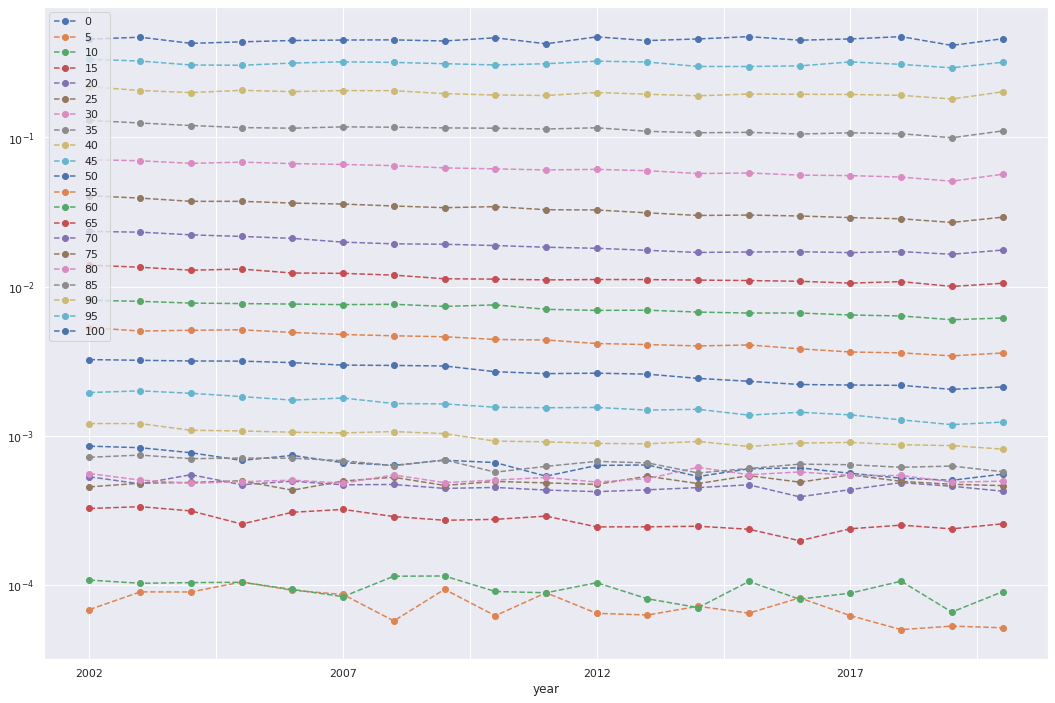

In [196]:
binned_5_unstacked.plot(figsize=(18,12),style='o--',logy=True)
plt.legend(loc='upper left')

In [197]:
binned_5_baseline = binned_5_unstacked.loc['2015' : '2018'].mean()
binned_5_baseline

bin_5
0      0.000572
5      0.000065
10     0.000095
15     0.000231
20     0.000445
25     0.000518
30     0.000551
35     0.000626
40     0.000878
45     0.001367
50     0.002223
55     0.003783
60     0.006527
65     0.010800
70     0.017067
75     0.029363
80     0.055867
85     0.106791
90     0.194078
95     0.307856
100    0.463904
dtype: float64

In [198]:
binned_5_growth = binned_5_unstacked.loc['2020'] / binned_5_baseline
binned_5_growth

bin_5
0      0.966002
5      0.796965
10     0.948282
15     1.112809
20     0.955717
25     0.894823
30     0.901161
35     0.917207
40     0.926187
45     0.903003
50     0.956629
55     0.948616
60     0.943686
65     0.974617
70     1.030320
75     0.994665
80     1.014840
85     1.036080
90     1.042327
95     1.037643
100    0.990077
dtype: float64

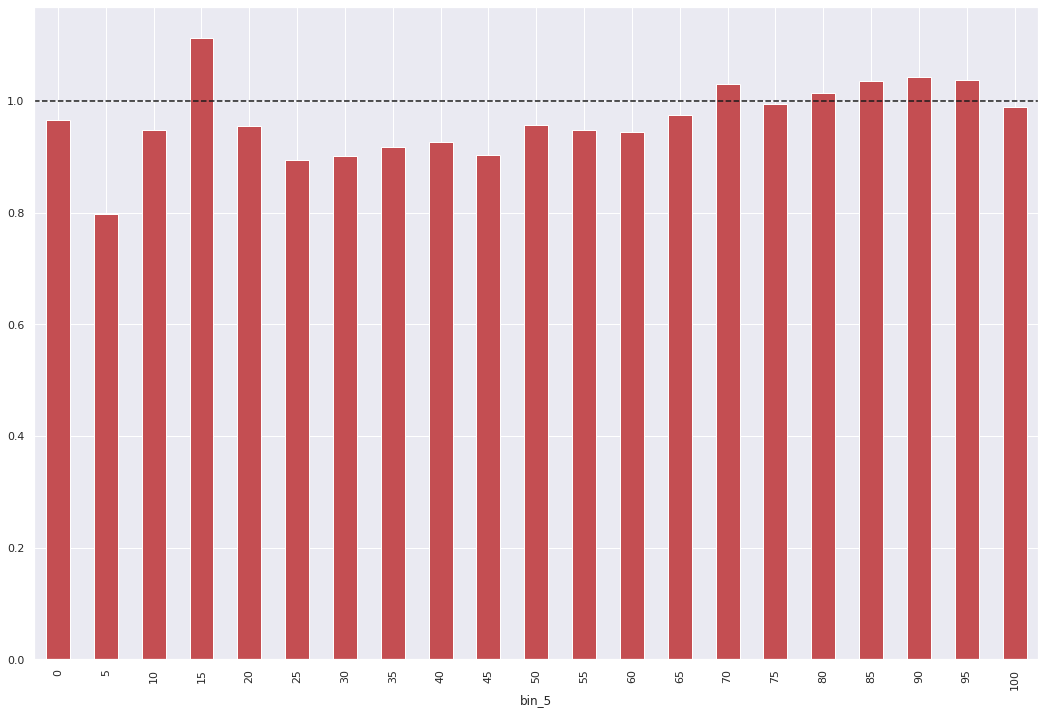

In [199]:
binned_5_growth.plot(kind='bar',figsize=(18,12),color='r')
plt.axhline(1,ls='dashed',color='k')